In [17]:
%pylab inline
import pandas as pd
from statsmodels.tsa import stattools

Populating the interactive namespace from numpy and matplotlib


Running the following query on the gdelt dataset in bigquery:


```sql
SELECT
  SQLDATE,
  Actor1CountryCode,
  COUNT(GLOBALEVENTID) AS EVENTS
FROM
  [gdelt-bq:full.events]
WHERE
  EventRootCode = "14"
GROUP BY
  SQLDATE,
  Actor1CountryCode
```

In [12]:
protests = pd.read_csv('protests_date_country.csv', parse_dates=['SQLDATE'])
protests = protests.pivot(index='SQLDATE',columns='Actor1CountryCode',values='EVENTS')
protests.fillna(0, inplace=True)
protests.head()

Actor1CountryCode,nan,ABW,AFG,AFR,AGO,AIA,ALB,AND,ARE,ARG,...,VNM,VUT,WAF,WLF,WSM,WST,YEM,ZAF,ZMB,ZWE
SQLDATE,,,,,,,,,,,,,,,,,,,,,
1979-01-01,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
1979-01-02,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979-01-03,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979-01-04,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979-01-05,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
weekly = protests.resample('W', how='sum')
#weekly.drop('nan', axis=1, inplace=True)
weekly.head()


Actor1CountryCode,nan,ABW,AFG,AFR,AGO,AIA,ALB,AND,ARE,ARG,...,VNM,VUT,WAF,WLF,WSM,WST,YEM,ZAF,ZMB,ZWE
SQLDATE,,,,,,,,,,,,,,,,,,,,,
1979-01-07,24,0,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0
1979-01-14,34,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
1979-01-21,36,0,6,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
1979-01-28,29,0,0,1,0,0,0,0,0,0,...,10,0,0,0,0,0,0,2,0,0
1979-02-04,24,0,0,0,0,0,0,0,0,0,...,23,0,0,0,0,0,0,0,0,0


Actor1CountryCode,nan,ABW,AFG,AFR,AGO,AIA,ALB,AND,ARE,ARG,...,VNM,VUT,WAF,WLF,WSM,WST,YEM,ZAF,ZMB,ZWE
SQLDATE,,,,,,,,,,,,,,,,,,,,,
1979-01-07,3.428571,0,0,0.000000,0,0,0,0,0,0,...,1.428571,0,0,0,0,0,0,0.000000,0,0
1979-01-14,4.857143,0,0,0.000000,0,0,0,0,0,0,...,1.000000,0,0,0,0,0,0,0.000000,0,0
1979-01-21,6.000000,0,1,0.000000,0,0,0,0,0,0,...,1.166667,0,0,0,0,0,0,0.000000,0,0
1979-01-28,4.142857,0,0,0.142857,0,0,0,0,0,0,...,1.428571,0,0,0,0,0,0,0.285714,0,0
1979-02-04,3.428571,0,0,0.000000,0,0,0,0,0,0,...,3.285714,0,0,0,0,0,0,0.000000,0,0


In [15]:
print protests.columns.values

[nan 'ABW' 'AFG' 'AFR' 'AGO' 'AIA' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASA'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS'
 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CAS'
 'CAU' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COK' 'COL' 'COM' 'CPV'
 'CRB' 'CRI' 'CUB' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA'
 'EAF' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'EUR' 'FIN' 'FJI' 'FRA' 'FSM'
 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GTM' 'GUY'
 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR'
 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT'
 'LAM' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA'
 'MAC' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT'
 'MMR' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NER' 'NGA' 'NIC' 'NLD'
 'NMR' 'NOR' 'NPL' 'NRU' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PGS' 'PHL' 'PLW'
 'PNG' 'POL' 'PRK' 'PRT' 'PRY' 'PSE' 'QAT' 'ROM' 'RUS

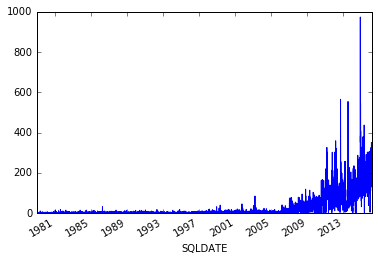

In [16]:
protests['USA'].plot()

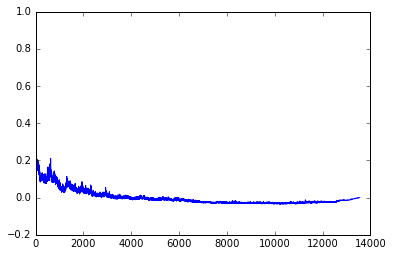

In [56]:
plt.plot(stattools.acf(protests['BRA'], nlags=50000))

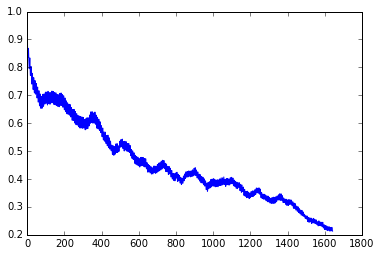

In [86]:
plt.plot(stattools.acf(protests.ix[:]['USA'], nlags=4.5*365))

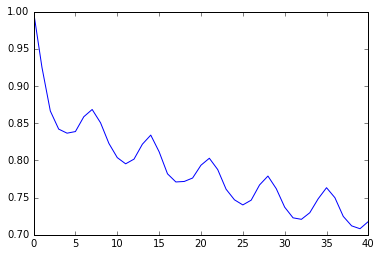

In [87]:
plt.plot(stattools.acf(protests.ix[:]['USA'], nlags=40))

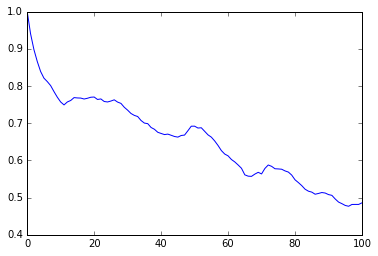

In [85]:
plt.plot(stattools.acf(weekly.ix[:]['USA'], nlags=100))

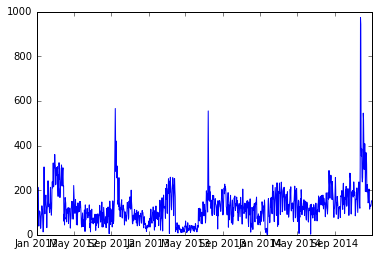

In [67]:
plt.plot(protests.ix['2012':'2014']['USA'])

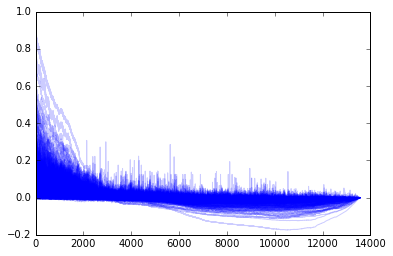

In [27]:
for country in protests.columns.values:
    plt.plot(stattools.acf(protests[country], nlags=14000), 'b', alpha=.2)

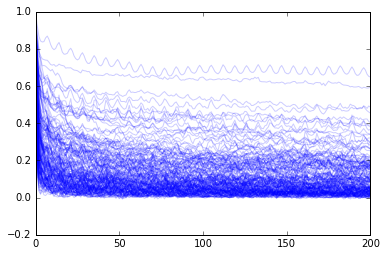

In [41]:
for country in protests.columns.values:
    if protests[country].sum() > 500 and protests[country].sum() < 500000:
        plt.plot(stattools.acf(protests[country], nlags=200), 'b', alpha=.2)

In [40]:
print protests.sum(axis=0)

Actor1CountryCode
NaN    1604806
ABW         39
AFG      22982
AFR      23513
AGO       1420
AIA         36
ALB       7840
AND         14
ARE       3667
ARG       4375
ARM       8355
ASA         39
ATG         91
AUS      23585
AUT       4013
AZE       7937
BDI       2079
BEL       5116
BEN        567
BFA       1420
BGD      12077
BGR       6489
BHR      11166
BHS        895
BLR       6005
BLZ        403
BMU        318
BOL       2715
BRA       5398
BRB        239
        ...   
TGO        579
THA      14116
TJK        989
TKM        546
TMP       1141
TON        144
TTO        991
TUN      14137
TUR      34052
TUV         28
TWN       2449
TZA       1503
UGA       5565
UKR      20949
URY        582
USA     334975
UZB       1439
VAT        838
VCT        122
VEN       7106
VNM       9534
VUT        119
WAF        182
WLF          1
WSM         88
WST       3432
YEM      16757
ZAF      13326
ZMB       2916
ZWE       7380
dtype: float64
